# XGBoost classifier

In [2]:
import pandas as pd
from io import StringIO
import numpy as np
import pickle 
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

Load necessary files

In [3]:
with open('pickles/features_train.pkl', 'rb') as f:
    features_train = pickle.load(f)

with open('pickles/labels_train.pickle', 'rb') as f:
    labels_train = pickle.load(f)

with open('pickles/features_test.pkl', 'rb') as f:
    features_test = pickle.load(f)

with open('pickles/labels_test.pkl', 'rb') as f:
    labels_test = pickle.load(f)

Define base model

In [4]:
estimator = XGBClassifier(
    objective = 'multi:softmax',
    nthread = -1,
    seed = 42
)

parameters = {
    'max_depth' : range (2, 11, 3),
    'n_estimators' : range (60, 220, 40), 
    'learning_rate' : [0.1, 0.01, 0.05]
}

# GridsearchCV
Define the parameter grid for tuning<br>
These cells have not been run, model returned from previous running was stored and used due to the large amount of time GridSearchCV takes on Boosting methods

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator, 
    param_grid=parameters, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=5, 
    verbose=True
)

In [ ]:
grid_search.fit(features_train, labels_train)
print(grid_search.best_estimator_)
best_xgb = grid_search.best_estimator_
    

In [ ]:
best_xgb.fit(features_train, labels_train)

In [ ]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_xgb.predict(features_train)))


In [ ]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, xgb_pred))

In [ ]:
print("Classification report")
print(classification_report(labels_test,xgb_pred))


In [ ]:
with open('pickles/best_xgb.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)


In [ ]:
with open('pickles/best_xgb.pkl', 'rb') as f:
    predictor = pickle.load(f)

print(predictor.get_xgb_params)


Best model obtained after GridSearchCV

In [4]:
estimator = XGBClassifier(
    base_score=0.5, booster=None, colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
    importance_type='gain', interaction_constraints=None,
    learning_rate=0.05, max_delta_step=0, max_depth=2,
    min_child_weight=1, monotone_constraints=None,
    n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
    objective='multi:softprob', random_state=42, reg_alpha=0,
    reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
    tree_method=None, validate_parameters=False, verbosity=None
)


Fit the model

In [ ]:
estimator.fit(features_train, labels_train)


# Analyse the model

The training accuracy is: 
0.8474777448071217
The test accuracy is: 
0.7440758293838863
Classification report
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.49      0.87      0.63        45
           2       0.86      0.75      0.80        16
           3       0.82      0.84      0.83        32
           4       0.83      0.81      0.82        43
           5       0.95      0.95      0.95        37
           6       0.88      0.80      0.84        45
           7       0.64      0.71      0.67        38
           8       0.72      0.59      0.65        44
           9       0.63      0.50      0.56        38
          10       0.84      0.63      0.72        43

    accuracy                           0.74       422
   macro avg       0.78      0.75      0.75       422
weighted avg       0.77      0.74      0.75       422



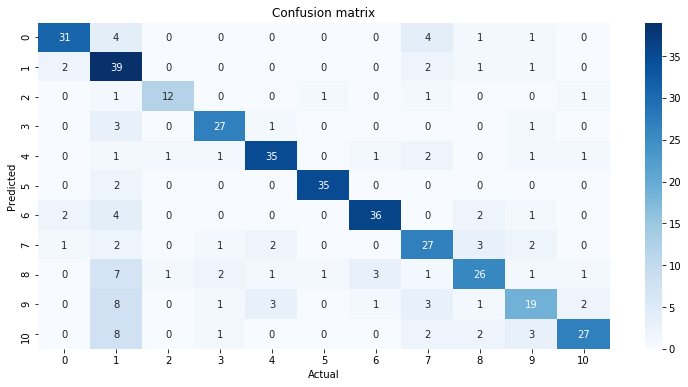

In [6]:
prediction_2 = estimator.predict(features_test)
print("The training accuracy is: ")
print(accuracy_score(labels_train, estimator.predict(features_train)))
print("The test accuracy is: ")
print(accuracy_score(labels_test, prediction_2))
print("Classification report")
print(classification_report(labels_test,prediction_2))

conf_matrix = confusion_matrix(labels_test, prediction_2)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

We look at macro average of the F1 score because of the absence of class imbalance<br>
We have a macro F1 score of 75%

Saving the model

In [7]:
with open('pickles/best_xgb_nourl.pkl', 'wb') as f:
    pickle.dump(estimator, f)

